<h3><> Logistic Regression pada Binary Classification Task</h3>
<b>Referensi:</b> <a href="https://en.wikipedia.org/wiki/Logistic_regression">https://en.wikipedia.org/wiki/Logistic_regression</a>

<h3><> Formula dasar pembentuk Logistic Regression | Fungsi Sigmoid</h3>

<strong>Simple Linear Regression</strong>
<ul>
<li>y = α + βx</li>
<li>g(x) = α + βx </li></ul>
<strong>Multiple Linear Regression</strong>
<ul>
<li>y = α + β₁x₁ + β₂x₂ + ... + βₙxₙ</li>
<li>g(X) = α + βX</li>
</ul>
<strong>Logistic Regression</Strong>
<ul>
<li>g(X) = sigmoid(a + ẞX)</li>
<li>sigmoid(x) = 1 / (1+exp(-x))</li>
</ul>

<img src="a.png" alt="Image description" style="max-width: 400px;" />


<h3><> Persiapan Dataset | Spam Collection Data Set</h3> 
Sumber Data: <a>https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection</a>

In [1]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')
print('NPM : 41155050210030\n')

import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi data

# Membaca dataset dari file CSV
df = pd.read_csv('./dataset/SMSSpamCollection',
                 sep='\t',  # Menentukan pemisah kolom sebagai tab
                 header=None,  # Tidak ada baris header dalam file
                 names=['label', 'sms'])  # Menentukan nama kolom

# Menampilkan 5 baris pertama dari DataFrame
df.head()

Nama: Aditya Rimandi Putra
NPM : 41155050210030



FileNotFoundError: [Errno 2] No such file or directory: './dataset/SMSSpamCollection'

In [ ]:
# Menghitung jumlah setiap label (spam dan ham)
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

<h3><> Pembagian training dan testing set

In [ ]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')
print('NPM : 41155050210030\n')

from sklearn.preprocessing import LabelBinarizer  # Mengimpor LabelBinarizer untuk mengubah label menjadi format biner
X = df['sms'].values  # Mengambil nilai SMS dari DataFrame
y = df['label'].values  # Mengambil nilai label dari DataFrame

# Membuat objek LabelBinarizer dan mengubah label menjadi format biner
lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()  # Transformasi dan meratakan array hasil

# Menampilkan kelas yang ada setelah binarisasi
lb.classes_

array(['ham', 'spam'], dtype='<U4')

In [ ]:
from sklearn.model_selection import train_test_split  # Mengimpor fungsi untuk membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  # Membagi data menjadi set pelatihan dan pengujian

# Menampilkan data pelatihan
print(X_train, '\n')
print(y_train)

['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] 

[0 1 0 ... 1 0 0]


<h3><> Feature extraction dengan TF-IDF

In [ ]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')
print('NPM : 41155050210030\n')

from sklearn.feature_extraction.text import TfidfVectorizer  # Mengimpor TfidfVectorizer untuk mengubah teks menjadi representasi numerik

# Membuat objek TfidfVectorizer dengan mengabaikan kata-kata umum (stop words)
vectorizer = TfidfVectorizer(stop_words='english')

# Mengubah data pelatihan menjadi representasi TF-IDF
X_train_tfidf = vectorizer.fit_transform(X_train)

# Mengubah data pengujian menjadi representasi TF-IDF menggunakan vektor yang sama
X_test_tfidf = vectorizer.transform(X_test)

# Menampilkan representasi TF-IDF dari data pelatihan
print(X_train_tfidf)

  (0, 6903)	0.3591386422223876
  (0, 2006)	0.2898082580285881
  (0, 900)	0.4114867709157148
  (0, 6739)	0.3546359942830148
  (0, 2554)	0.3825278811525034
  (0, 3926)	0.3126721340000456
  (0, 4453)	0.2297719954323795
  (0, 5123)	0.308974289326673
  (0, 3007)	0.21421364306658514
  (0, 2997)	0.23173982975834367
  (1, 36)	0.28902673040368515
  (1, 1548)	0.18167737976542422
  (1, 2003)	0.2711077935907125
  (1, 5301)	0.2711077935907125
  (1, 4358)	0.17341410292348694
  (1, 532)	0.20186022353306565
  (1, 6131)	0.16142609035094446
  (1, 5394)	0.16464655071448758
  (1, 4677)	0.24039776602646504
  (1, 216)	0.28902673040368515
  (1, 6013)	0.20089911182610476
  (1, 6472)	0.24039776602646504
  (1, 5441)	0.5009783758205715
  (1, 799)	0.25048918791028574
  (1, 5642)	0.24344998442301355
  :	:
  (4176, 343)	0.2811068572055718
  (4176, 107)	0.29968668460649284
  (4176, 2004)	0.25589560236817055
  (4176, 4350)	0.29968668460649284
  (4176, 637)	0.29968668460649284
  (4176, 7114)	0.4512018097459442
  (4176

<h3><> Binary Classification dengan Logistic Regression

In [ ]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')
print('NPM : 41155050210030\n')

from sklearn.linear_model import LogisticRegression  # Mengimpor LogisticRegression dari scikit-learn

# Membuat objek model Logistic Regression
model = LogisticRegression()

# Melatih model menggunakan data pelatihan TF-IDF dan label
model.fit(X_train_tfidf, y_train)

# Memprediksi label untuk data pengujian TF-IDF
y_pred = model.predict(X_test_tfidf)

# Menampilkan 5 prediksi pertama beserta SMS yang sesuai
for pred, sms in zip(y_pred[:5], X_test[:5]):
    print(f'PRED: {pred} SMS: {sms}\n')

PRED: 0 SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@

PRED: 0 SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.

PRED: 0 SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed

PRED: 0 SMS: Sir Goodmorning, Once free call me.

PRED: 0 SMS: All will come alive.better correct any good looking figure there itself..



<h3><> Evaluation Metrics pada Binary Classification</h3>

<ul>
  <li>Confusion Matrix</li>
  <li>Accuracy</li>
  <li>Precission & Recall</li>
  <li>F1 Score</li>
  <li>ROC</li>
</ul>

<strong>Terminologi Dasar</strong> <ul> <li>True Positive (TP)</li> <li>True Negative (TN)</li> <li>False Positive (FP)</li> <li>False Negative (FN)</li> </ul>

<h3><> Pengenalan Confusion Matrix</h3>
Confusion matrix seringkali juga dikenal sebagai error matrix.

Referensi: https://en.wikipedia.org/wiki/Confusion_matrix

In [ ]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')
print('NPM : 41155050210030\n')

from sklearn.metrics import confusion_matrix  # Mengimpor fungsi confusion_matrix dari scikit-learn

# Membuat matriks kebingungan (confusion matrix) berdasarkan label sebenarnya dan prediksi
matrix = confusion_matrix(y_test, y_pred)

# Menampilkan matriks kebingungan
matrix

array([[1207,    1],
       [  47,  138]], dtype=int64)

In [ ]:
# Mengambil nilai TN, FP, FN, TP dari matriks kebingungan
tn, fp, fn, tp = matrix.ravel()

# Mencetak nilai TN, FP, FN, TP
print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 1207
FP: 1
FN: 47
TP: 138


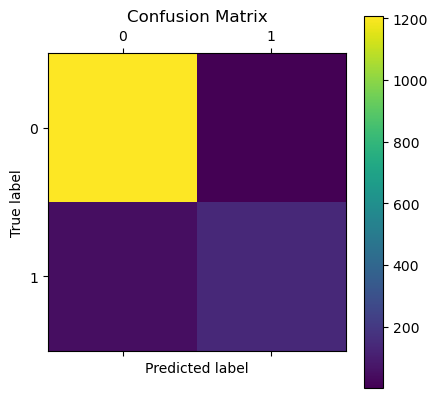

In [ ]:
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi

# Menampilkan matriks kebingungan sebagai gambar
plt.matshow(matrix)  # Menggunakan matshow untuk menampilkan matriks kebingungan

plt.colorbar()  # Menambahkan bar warna untuk menunjukkan skala nilai
plt.title('Confusion Matrix')  # Menambahkan judul pada grafik
plt.ylabel('True label')  # Menambahkan label pada sumbu y
plt.xlabel('Predicted label')  # Menambahkan label pada sumbu x
plt.show()  # Menampilkan grafik

<h3><> Pengenalan Accuracy Score</h3>
Accuracy (Akurasi) merupakan pengukuran proporsi prediksi yang benar dari total prediksi. Rumus akurasi adalah:

Akurasi = TP+TN / TP+TN+FP+FN = (Jumlah prediksi benar) / (Jumlah total prediksi)

Contohnya, jika model Anda memprediksi 100 data dan 90 di antaranya benar, maka akurasinya adalah 90%.

Referensi: https://en.wikipedia.org/wiki/Accuracy_and_precision

In [ ]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')
print('NPM : 41155050210030\n')

from sklearn.metrics import accuracy_score  # Mengimpor fungsi accuracy_score dari scikit-learn

# Menghitung dan menampilkan akurasi model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9655419956927495

<!DOCTYPE html> <html> <head> <title>Precision & Recall</title> </head> <body> 
<h3><> Pengenalan Precision dan Recall</h3>
<strong>Precission & Recall</strong> <p>Selain menggunakan accuracy, performa dari suatu classifier umumnya juga diukur berdasarkan nilai Precission dan Recall.</p> <p>Referensi: <a href="https://en.wikipedia.org/wiki/Precision_and_recall">https://en.wikipedia.org/wiki/Precision_and_recall</a></p> <strong>Precission or Positive Predictive Value (PPV)</strong> <p>Precission = TP / TP+FP</p> <p>Referensi: <a href="https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values">https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values</a></p> </body> </html>

In [ ]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')
print('NPM : 41155050210030\n')

from sklearn.metrics import precision_score  # Mengimpor fungsi precision_score dari scikit-learn

# Menghitung dan menampilkan presisi model
precision = precision_score(y_test, y_pred)
precision

0.9928057553956835

<strong>Recall or True Positive Rate (TPR) or Sensitivity</strong> <p>Recall = TP / TP+FN</p> <p>Referensi: <a href="https://en.wikipedia.org/wiki/Sensitivity_and_specificity">https://en.wikipedia.org/wiki/Sensitivity_and_specificity</a>

In [ ]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')
print('NPM : 41155050210030\n')

from sklearn.metrics import recall_score  # Mengimpor fungsi recall_score dari scikit-learn

# Menghitung dan menampilkan recall model
recall = recall_score(y_test, y_pred)
recall

0.745945945945946

<h3><> Pengenalan F1 Score | F1 Measure</h3>
<strong>F1-Score</strong> <p>F1-score atau F1-measure adalah harmonic mean dari precission dan recall.</p> <p>F1 score = precission × recall / precission + recall </p> <p>Referensi: <a href="https://en.wikipedia.org/wiki/F-score">https://en.wikipedia.org/wiki/F-score</a></p>

In [ ]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')
print('NPM : 41155050210030\n')

from sklearn.metrics import f1_score  # Mengimpor fungsi f1_score dari scikit-learn

# Menghitung dan menampilkan F1-score model
f1_score(y_test, y_pred)


0.8518518518518519

<h3><> Pengenalan ROC | Receiver Operating Characteristic</h3>
<strong>ROC: Receiver Operating Characteristic</strong> <br>

ROC menawarkan visualisasi terhadap performa dari classifier dengan membandingkan nilai Recall (TPR) dan nilai Fallout (FPR) <br>

fallout = FP / TN+FP <br>

Referensi: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

<img src="b.png" alt="Image description" style="max-width: 400px;" />

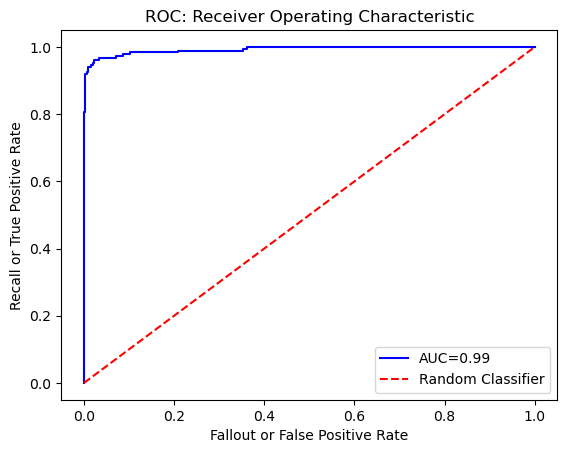

In [ ]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')
print('NPM : 41155050210030\n')

from sklearn.metrics import roc_curve, auc  # Mengimpor fungsi roc_curve dan auc dari scikit-learn
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk visualisasi

# Menghitung probabilitas prediksi dari model
prob_estimates = model.predict_proba(X_test_tfidf)

# Menghitung False Positive Rate (FPR), True Positive Rate (TPR), dan threshold
fpr, tpr, threshold = roc_curve(y_test, prob_estimates[:, 1])

# Menghitung Area Under the Curve (AUC)
nilai_auc = auc(fpr, tpr)

# Memvisualisasikan ROC Curve
plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc:.2f}')  # Plot ROC Curve
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')  # Garis acuan untuk classifier acak
plt.title('ROC: Receiver Operating Characteristic')  # Judul plot
plt.xlabel('Fallout or False Positive Rate')  # Label sumbu X
plt.ylabel('Recall or True Positive Rate')  # Label sumbu Y
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot